# 다차원 텐서 (다차원 배열)

### 다차원 배열의 계산 복습

In [1]:
import numpy as np

In [6]:
A = np.array([[1, 2, 3], 
              [4, 5, 6]])
B = np.array([[7, 8, 9], 
              [10, 11, 12]])

add_result = A + B

vec = np.array([1, 2, 3])
add_result2 = A + vec   # 브로드캐스팅

print(add_result)
print(add_result2)

dot_result = A.dot(B.T) # 전치행렬 T
print(dot_result)

[[ 8 10 12]
 [14 16 18]]
[[2 4 6]
 [5 7 9]]
[[ 50  68]
 [122 167]]


### 다차원 배열의 계산으로 순전파 구현

In [11]:
# 입력 데이터
X = np.random.randn(4, 5)       # 4개의 샘플, 5차원 feature

# 가중치
W = np.random.randn(5, 3)       # 5개의 입력(feature)와 3개의 뉴런으로 구성된 레이어

# 편향
b = np.random.randn(1, 3)       

# 선형 계산(W*X + b)
z = np.dot(X, W) + b

# ReLU 활성화 함수
result = np.maximum(0, z)

print(result)

[[0.37341617 1.06298974 1.98610425]
 [0.62963835 0.         1.61614001]
 [1.59626658 0.40155146 1.92635206]
 [0.         3.05868947 1.1874179 ]]


### 다층 퍼셉트론

In [21]:
X = np.random.randn(6, 10)

# 은닉층 : 10개의 입력 -> 8개의 뉴런
W1 = np.random.randn(10, 8)
b1 = np.random.randn(1, 8)


# 출력층 : 8개의 입력 -> 4개의 클래스
W2 = np.random.randn(8, 4)
b2 = np.random.randn(1, 4)

# 은닉층 계산 (선형 계산 + tanh 활성화 함수)
z1 = np.dot(X, W1) + b1
result1 = np.tanh(z1)

# 출력층 계산 (선형 계산 + softmax 활성화 함수)
z2 = np.dot(result1, W2) + b2
exp_x = np.exp(z2 - np.max(z2, axis=1, keepdims=True))
reuslt2 = exp_x / np.sum(exp_x, axis=1, keepdims=True)

print(reuslt2)

[[0.12656851 0.05797321 0.73085214 0.08460613]
 [0.58505622 0.07684621 0.0009901  0.33710747]
 [0.67192646 0.23883977 0.03183719 0.05739658]
 [0.11435838 0.06145637 0.80725308 0.01693217]
 [0.38718353 0.08156482 0.00670844 0.52454321]
 [0.6059051  0.28749916 0.02055046 0.08604528]]


### 이미지 데이터 예시

(np.float64(-0.5), np.float64(31.5), np.float64(31.5), np.float64(-0.5))

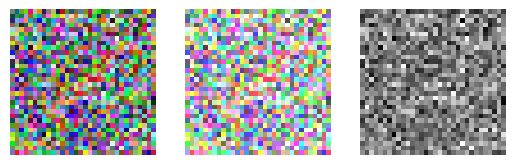

In [26]:
import matplotlib.pyplot as plt

# 이미지 생성
batch_size = 5
channels = 3
height = 32
width = 32

images = np.random.rand(batch_size, channels, height, width)    # channels는 컬러로 3개 r,g,b

bright_images = np.clip(images + 0.2, 0, 1)

gray_images = np.mean(images, axis=1) # 흑백 이미지로 r, g, b를 평균값으로

# PyTorch 프레임워크에서는 이미지 데이터를 (채널, 높이, 너비) 순서로 저장
# matplotlib.pyploy.imshow()는 (높이, 너비, 채널) 순으로 기대
# 따라서 transpose()를 이용해 축의 순서를 재배열
images_for_display = images[0].transpose(1, 2, 0) # 임의로 순서 변경
bright_images_display = bright_images[0].transpose(1, 2, 0)

plt.subplot(1, 3, 1)
plt.imshow(images_for_display) # 높이 너비 채널 순으로
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(bright_images_display)
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(gray_images[0], cmap='gray')
plt.axis('off')
